In [245]:
import sys
print(sys.executable)


c:\Users\av979\anaconda3\envs\profiling-env\python.exe


In [246]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.datasets import fetch_california_housing 

In [247]:
housing = fetch_california_housing() # isme data dictionary ke form m store hai as a key value pair
print(housing.keys())
print(housing.target_names)
print(housing.feature_names)
print(housing.DESCR)
df = pd.DataFrame(housing.data , columns=housing.feature_names)
df['HouseValue'] = housing.target

dict_keys(['data', 'target', 'frame', 'target_names', 'feature_names', 'DESCR'])
['MedHouseVal']
['MedInc', 'HouseAge', 'AveRooms', 'AveBedrms', 'Population', 'AveOccup', 'Latitude', 'Longitude']
.. _california_housing_dataset:

California Housing dataset
--------------------------

**Data Set Characteristics:**

:Number of Instances: 20640

:Number of Attributes: 8 numeric, predictive attributes and the target

:Attribute Information:
    - MedInc        median income in block group
    - HouseAge      median house age in block group
    - AveRooms      average number of rooms per household
    - AveBedrms     average number of bedrooms per household
    - Population    block group population
    - AveOccup      average number of household members
    - Latitude      block group latitude
    - Longitude     block group longitude

:Missing Attribute Values: None

This dataset was obtained from the StatLib repository.
https://www.dcc.fc.up.pt/~ltorgo/Regression/cal_housing.html

The tar

In [248]:
df.head(7)

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,HouseValue
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422
5,4.0368,52.0,4.761658,1.103627,413.0,2.139896,37.85,-122.25,2.697
6,3.6591,52.0,4.931907,0.951362,1094.0,2.128405,37.84,-122.25,2.992


In [249]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   MedInc      20640 non-null  float64
 1   HouseAge    20640 non-null  float64
 2   AveRooms    20640 non-null  float64
 3   AveBedrms   20640 non-null  float64
 4   Population  20640 non-null  float64
 5   AveOccup    20640 non-null  float64
 6   Latitude    20640 non-null  float64
 7   Longitude   20640 non-null  float64
 8   HouseValue  20640 non-null  float64
dtypes: float64(9)
memory usage: 1.4 MB


### All columns are of float type , no categorical column is present (no encoding required)

In [250]:
df.isnull().sum().sum()

np.int64(0)

### No columns have any null values

In [251]:
df.duplicated().sum() # if df.duplicated() --> ye ek true/false ki boolean series return krta

np.int64(0)

### No duplicate rows are present

In [252]:
df.describe()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,HouseValue
count,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,3.870671,28.639486,5.429000,1.096675,1425.476744,3.070655,35.631861,-119.569704,2.068558
std,1.899822,12.585558,2.474173,0.473911,1132.462122,10.386050,2.135952,2.003532,1.153956
min,0.499900,1.000000,0.846154,0.333333,3.000000,0.692308,32.540000,-124.350000,0.149990
25%,2.563400,18.000000,4.440716,1.006079,787.000000,2.429741,33.930000,-121.800000,1.196000
50%,3.534800,29.000000,5.229129,1.048780,1166.000000,2.818116,34.260000,-118.490000,1.797000
75%,4.743250,37.000000,6.052381,1.099526,1725.000000,3.282261,37.710000,-118.010000,2.647250
max,15.000100,52.000000,141.909091,34.066667,35682.000000,1243.333333,41.950000,-114.310000,5.000010


### There is a very high standard deviation in population , aveoccup , averooms . It is due to variation of size of the block group <br> <br>

# VISUALISATION

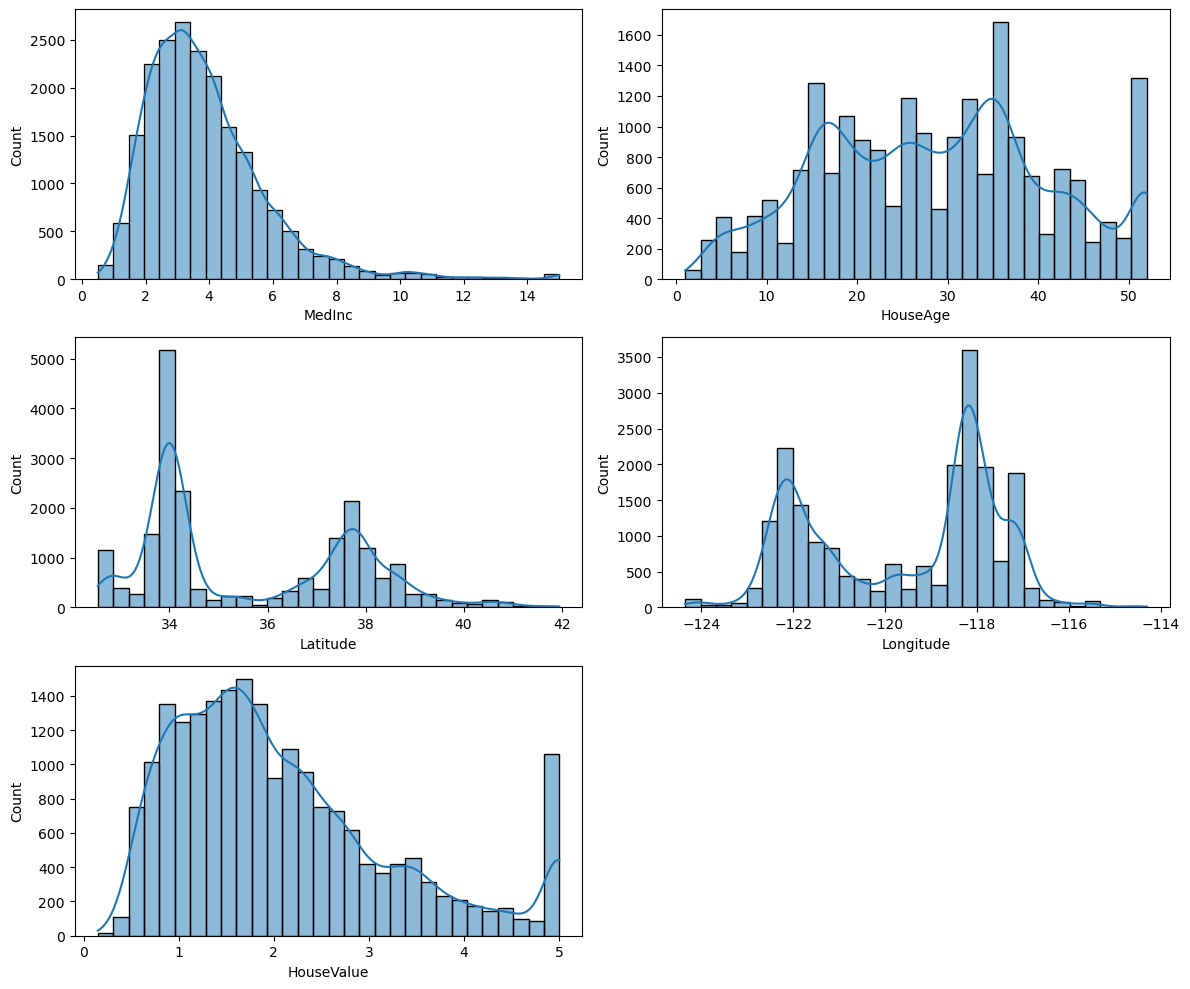

In [253]:
columns = ['MedInc' , 'HouseAge' , 'Latitude' , 'Longitude' ,'HouseValue']
plt.figure(figsize=(12,10))
j = 1
for i in columns:
    plt.subplot(3,2,j)
    sns.histplot( df[i] , bins = 30 , kde = True)
    j+=1
    plt.tight_layout()

### The median income of block group is rightly skewed i.e, some block group have high MedInc 
### Most of the block group house's average age is in b/w 15 and 35
### Most of the houses have latitude of 34 North (southern california {near los angeles})
### Most houses have -118 longitude (West Coast of US(LA region))
### Most house have price range in b/w $50,000 to 250,000

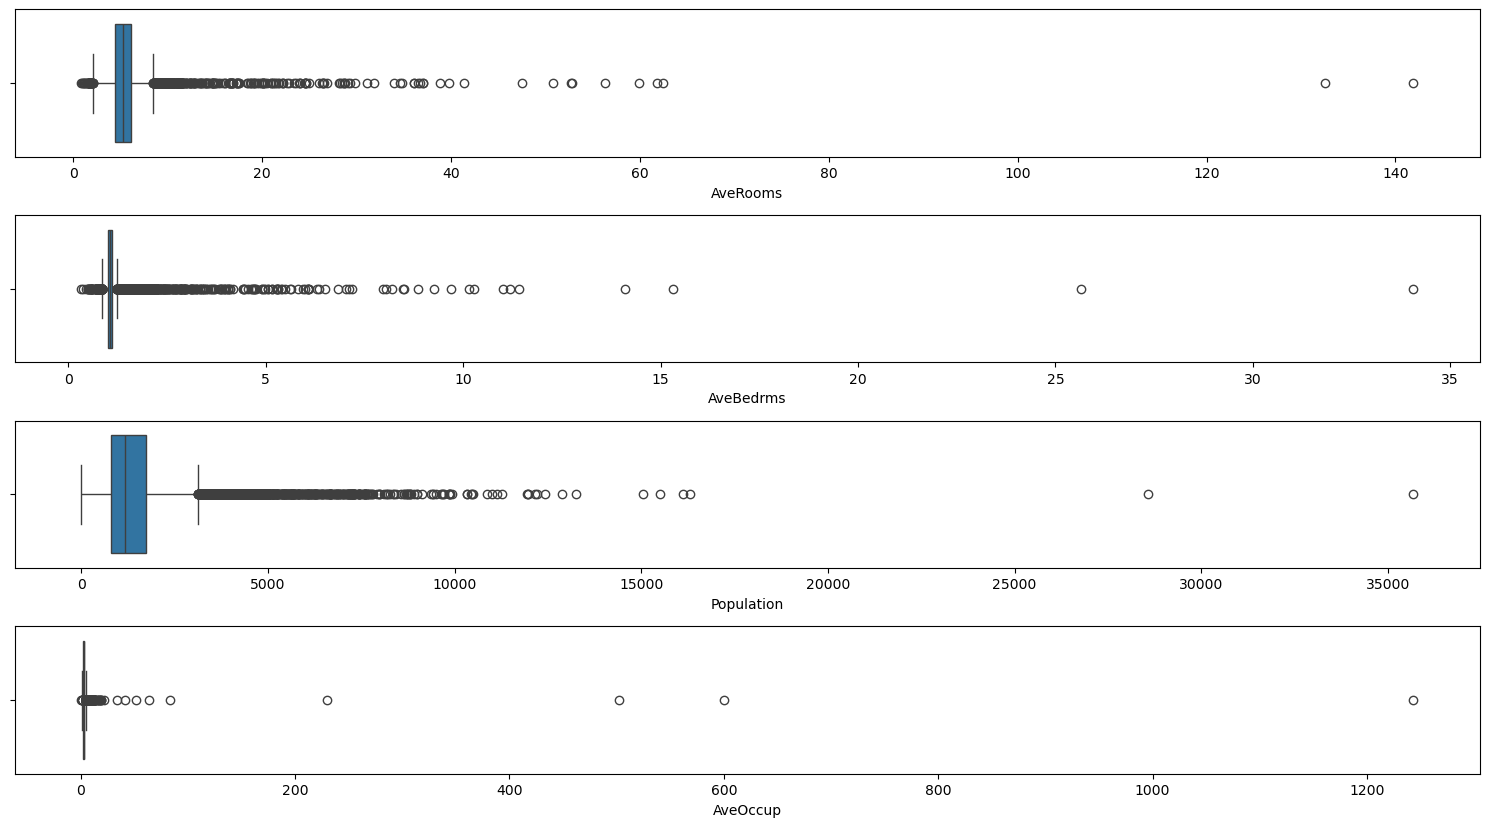

In [254]:
columns1 = ['AveRooms' , 'AveBedrms' , 'Population' , 'AveOccup']
plt.figure(figsize=(15,10))
j=1
for i in columns1:
    plt.subplot(5,1,j)
    sns.boxplot( x= df[i])
    j+=1
    plt.tight_layout()

### There are lot of outliers present in AveRooms , AveBedrms , Population (We can treat it by Robust Scaling)

<Axes: >

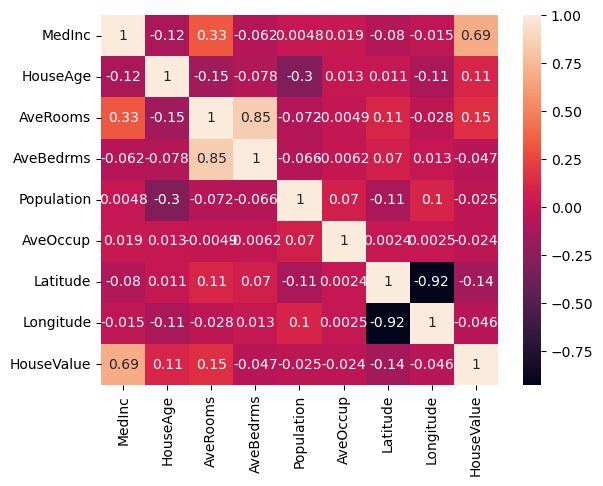

In [255]:
sns.heatmap(df.corr() , annot = True )

### Housevalue is majorily dependent on MedianIncome & little on HouseAge & AveRooms

<Axes: xlabel='MedInc', ylabel='HouseValue'>

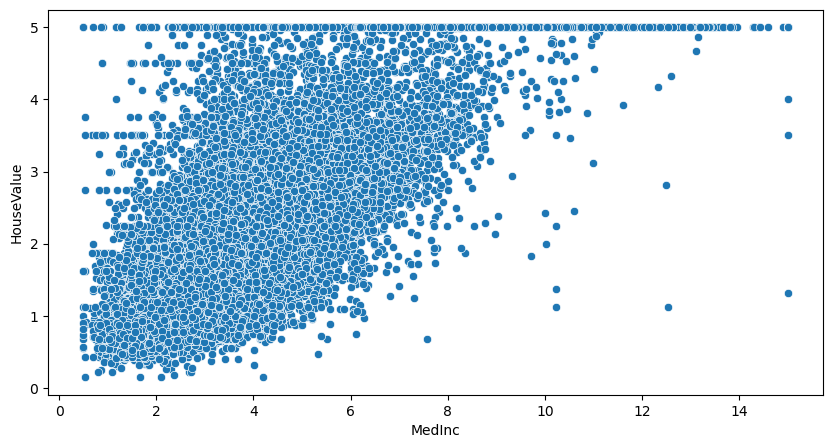

In [256]:
plt.figure(figsize = (10,5))
sns.scatterplot(data = df , x = 'MedInc' , y = 'HouseValue')

### Most of the HouseValue data is linearly dependent on MedianIncome

<Axes: xlabel='Latitude', ylabel='Longitude'>

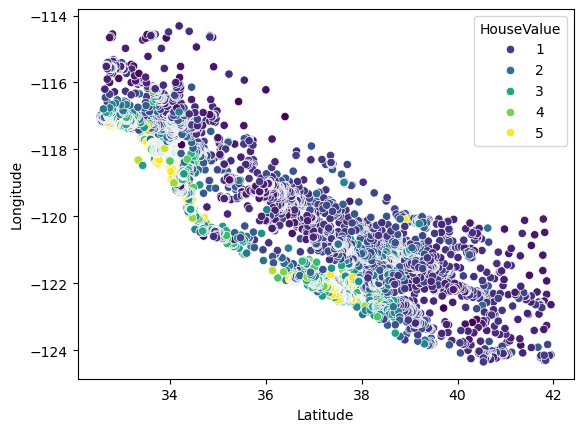

In [257]:
sns.scatterplot(data = df , x = 'Latitude' , y = 'Longitude' , hue = 'HouseValue' , palette = 'viridis')

### The latitude (34 to 38) and longitude (-118 to -122) covers Southern and Central California which includes LosAngeles , San Fransisco , coastal corridor and generally have very high House price and latitude , longitude are linearly related.

In [258]:
df['BedroomPerRoom'] = df['AveBedrms']/df['AveRooms']
df['RoomsPerPerson'] = df['AveRooms']/df['AveOccup']
df['IncomePerPerson'] = df['MedInc']/df['AveOccup']
df['Lat_Long_Interaction'] = df['Latitude'] * df['Longitude']

### New feature ko generate kiya h jo hmare House_Value se jyada correlated hai

<Axes: >

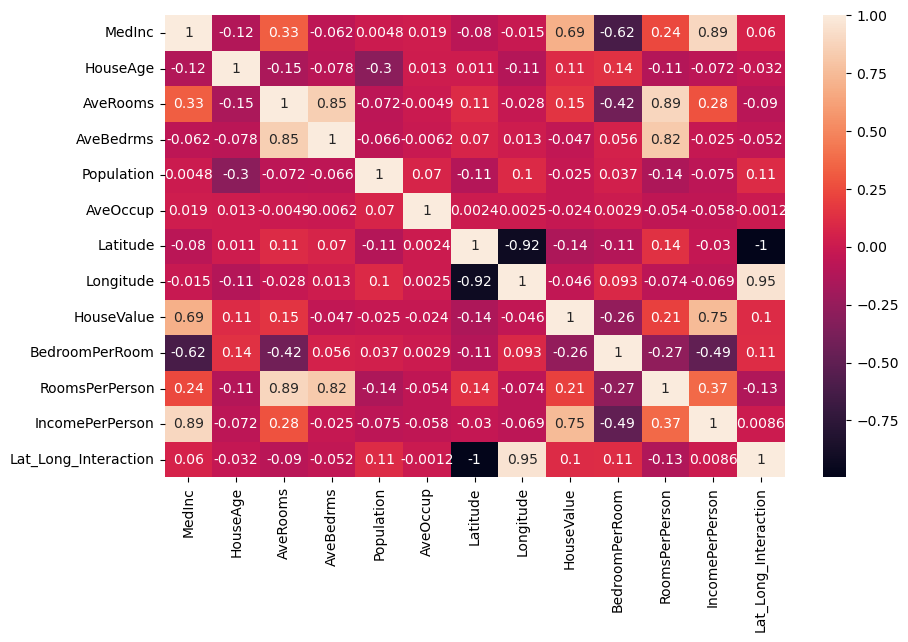

In [259]:
plt.figure(figsize=(10,6))
sns.heatmap(df.corr() , annot = True)

In [260]:
df.skew()

MedInc                   1.646657
HouseAge                 0.060331
AveRooms                20.697869
AveBedrms               31.316956
Population               4.935858
AveOccup                97.639561
Latitude                 0.465953
Longitude               -0.297801
HouseValue               0.977763
BedroomPerRoom           2.246891
RoomsPerPerson          17.775133
IncomePerPerson          1.457508
Lat_Long_Interaction    -0.416861
dtype: float64

array([[<Axes: title={'center': 'MedInc'}>,
        <Axes: title={'center': 'HouseAge'}>,
        <Axes: title={'center': 'AveRooms'}>,
        <Axes: title={'center': 'AveBedrms'}>],
       [<Axes: title={'center': 'Population'}>,
        <Axes: title={'center': 'AveOccup'}>,
        <Axes: title={'center': 'Latitude'}>,
        <Axes: title={'center': 'Longitude'}>],
       [<Axes: title={'center': 'HouseValue'}>,
        <Axes: title={'center': 'BedroomPerRoom'}>,
        <Axes: title={'center': 'RoomsPerPerson'}>,
        <Axes: title={'center': 'IncomePerPerson'}>],
       [<Axes: title={'center': 'Lat_Long_Interaction'}>, <Axes: >,
        <Axes: >, <Axes: >]], dtype=object)

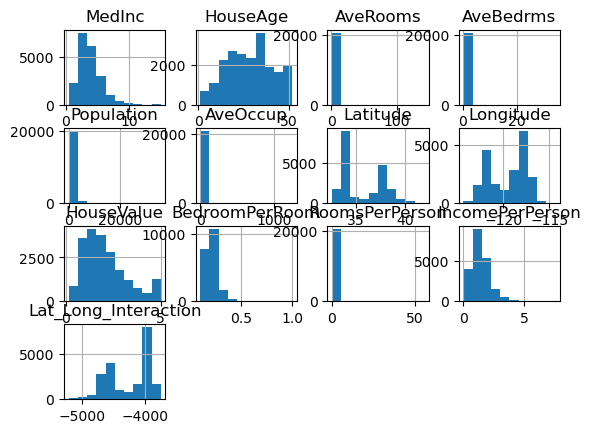

In [261]:
df.hist()

### Some cols have very high skewness We can reduce itby log transformation

In [262]:
df['AveRooms_log'] = np.log1p(df['AveRooms'])
df['AveOccup_log'] = np.log1p(df['AveOccup'])
df['RoomsPerPerson_log'] = np.log1p(df['RoomsPerPerson'])
df['AveBedrms_log'] = np.log1p(df['AveBedrms'])    
# ye larger values ko compress krke chhote values k pass le aata hai aur vice-versa(standardized kr dega jisse outliers ka utna effect na aaye)

In [263]:
df.skew()

MedInc                   1.646657
HouseAge                 0.060331
AveRooms                20.697869
AveBedrms               31.316956
Population               4.935858
AveOccup                97.639561
Latitude                 0.465953
Longitude               -0.297801
HouseValue               0.977763
BedroomPerRoom           2.246891
RoomsPerPerson          17.775133
IncomePerPerson          1.457508
Lat_Long_Interaction    -0.416861
AveRooms_log             1.390761
AveOccup_log             3.879679
RoomsPerPerson_log       1.046767
AveBedrms_log            8.988786
dtype: float64

### Negative corr of BedroomPerRoom specifies with house value , there are luxury rooms.
### Houses with more rooms per person have higher values
### Higher corr of IncomePerPerson with housevalue signifies these are richer area (luxury houses)

In [264]:
df.drop(columns = ['AveRooms' , 'AveOccup' , 'RoomsPerPerson' , 'AveBedrms'] , inplace = True)

In [265]:
X = df.drop('HouseValue' , axis = 1)
y = df['HouseValue']
from sklearn.preprocessing import RobustScaler
scaler = RobustScaler()

In [266]:
from sklearn.model_selection import train_test_split
X_train , X_test , y_train , y_test = train_test_split(X , y , test_size = 0.2 , random_state = 42) # random state ka use hmne hr baar train aur test data ko same rkhne ke liye kiya hai 
#Standardized the data
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)   # the model shouldn't see test data during scaling -> data ko leakage se bchayega
print(X_train.shape , X_test.shape)
print(y_train.shape , y_test.shape)

(16512, 12) (4128, 12)
(16512,) (4128,)


In [267]:
from sklearn.linear_model import LinearRegression
regression = LinearRegression()
regression.fit(X_train , y_train)
reg_pred = regression.predict(X_test)


<Axes: xlabel='HouseValue', ylabel='Density'>

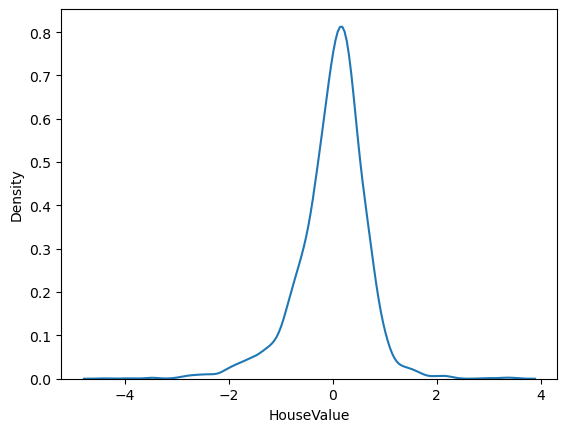

In [268]:
# seaborn visualisation 
sns.kdeplot(reg_pred - y_test) #

### ye hme bta rha ki most of the differnce value ka jo distribution h wo normal distribution k aas paas hi h

<br>

# Model Evaluation :  

In [269]:
from sklearn.metrics import r2_score , mean_squared_error
score1 = r2_score(y_test, reg_pred) # hm test aur predicted values ka order nhi chnage kr skte kyuki metrics store order valuesw
print(score1 * 100)
score2 = mean_squared_error(y_test , reg_pred)
print(score2) 
import math
print(f'{math.sqrt(score2)} is the RMSE value')

66.77985144633641
0.43531980923217223
0.6597877001219197 is the RMSE value


 rmse bta rha h ki hmari predicted value mean se kitna vary kr rhi h <br>
 R2 66.78% house variation price ko bta pa rha hai 

## Adjusted R2 :

In [270]:
rows = X_test.shape[0]
cols = X_test.shape[1]
adjusted_r2 = 1-(1-score1)*(rows-1)/(rows-cols-1)
print(f'Adjusted R2 is {adjusted_r2*100}')

Adjusted R2 is 66.68297616501344


Adjusted r2 hme actual performance deta h model ki jabki r2 useless feature ko consider krke bhi accuracy ki value bdha deta h

<br>

# PCA :
### We are going to use the PCA(principal component analysis) -> kyuki hm upr heatmap se dekh skte h ki hmare input cols m multi-collinearnity jo hmare model pe negative impact daal rhi hogi (model choose nhi kr pa rha hoga kis feature ko choose kru)

In [340]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
scaler = StandardScaler()
X_Scaled_1 = scaler.fit_transform(X)
y_Scaled_1 = y
pca = PCA(n_components = 6)
X_pca = pca.fit_transform(X_Scaled_1)
X_pca.shape

(20640, 6)

In [341]:
explained_var = pca.explained_variance_   # har ek component ka variance btata hai 
explained_var

array([3.75537937, 2.86824294, 1.56674562, 1.43095721, 1.08552936,
       0.64862449])

In [342]:
explained_var_ratio = pca.explained_variance_ratio_  # ye btata hai ki har ek principal component total variance ka kitna hissa explain kr rha hai
explained_var_ratio                                    

array([0.31293312, 0.23900866, 0.13055581, 0.11924066, 0.0904564 ,
       0.05404942])

In [343]:
cum_exp_var_ratio = np.cumsum(explained_var_ratio)  # isko hm isliye check kr rhe h ki hm kitne components le skte h jisse hm maximum variance explain kr ske
cum_exp_var_ratio

array([0.31293312, 0.55194178, 0.68249759, 0.80173825, 0.89219465,
       0.94624407])

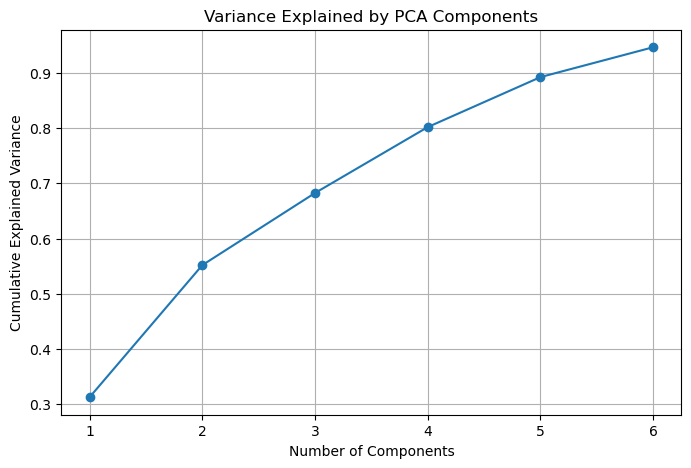

In [344]:
plt.figure(figsize=(8,5))
plt.plot(range(1, len(explained_var)+1), cum_exp_var_ratio, marker='o')
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance')
plt.title('Variance Explained by PCA Components')
plt.grid(True)
plt.show()

<Axes: xlabel='HouseValue', ylabel='Density'>

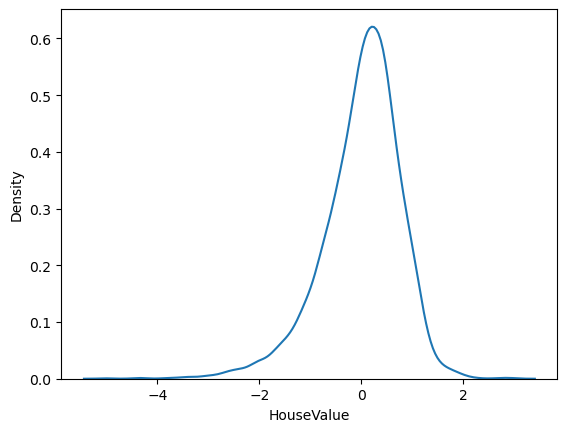

In [345]:
X_train , X_test , y_train , y_test = train_test_split(X_pca , y_Scaled_1 , test_size = 0.2 , random_state = 42)
regression.fit(X_train , y_train)
reg_pred1 = regression.predict(X_test)
sns.kdeplot(reg_pred1 - y_test)

In [348]:
R21 = r2_score(y_test, reg_pred1) # hm test aur predicted values ka order nhi chnage kr skte kyuki metrics store order valuesw
R21*100

54.776241713373565

In [349]:
rows = X_test.shape[0]
cols = X_test.shape[1]
adjusted_r2 = 1-(1-R21)*(rows-1)/(rows-cols-1)
print(f'Adjusted R2 is {adjusted_r2*100}')

Adjusted R2 is 54.71039785272816


### Hm sirf ab 13 ki jgh 6 cols ka use krke itni accuracy achieve kr pa rhe h 